In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams['figure.dpi'] = 300
path = '../images/survey/'

In [3]:
df = pd.read_csv("../results/Questionnaire ostréiculteurs.csv")

In [4]:
df["Horodateur"] = pd.to_datetime(df["Horodateur"])# change first column to date

# Replace NaN values by 0
for i in df.columns:
    df[i] = df[i].fillna(0)
    
df

,Horodateur,Nom - Prénom,Nom de ma ferme ostréicole,La ferme se situe dans la région,Si vous êtes situé dans la région méditerranéenne êtes vous situé sur le bassin de Thau ?,Je suis ostréiculteur depuis,Je travaille seul(e) à ma ferme ostréicole,La ferme est une ferme familiale,J'ai toujours exercé ce métier,Dans ma ferme je cultive uniquement des huîtres,...,"S'il le faut, je suis prêt(e) à réaliser des tests",Je trouve qu'il est contraignant de réaliser les tests moi-même,"Si oui, pourquoi ?.1",Quel prix MAXIMAL suis-je prêt(e) à payer UN test ?,Ouvrir une huître pour réaliser le test me pose problème,Le projet mérite d'aboutir à la vente du test,Si le test est en vente je l'achète,Avez-vous des suggestions ? remarques ?,J'accepte d'être recontacté(e) pour un échange,"Si oui, veuillez renseigner votre adresse mail, téléphone..."
0,2022-07-23 20:31:48-02:00,Rousseau Éric,Earl huîtres rousseau,Poitou-Charentes,Non,Plus de 10 ans,Non,Oui,Oui,Oui,...,Une fois par mois,Oui,Pas de temps,5,1,5,Oui,0,0,0
1,2022-07-23 22:30:08-02:00,Campagne Terence,Earl campagne & fils,Arcachon - Aquitaine,0,Plus de 10 ans,Non,Oui,Oui,Oui,...,Deux fois par mois,Non,0,5,1,4,Peut être / après réflexion,0,0,0
2,2022-07-26 17:10:54-02:00,0,0,Arcachon - Aquitaine,Non,Plus de 10 ans,Non,Oui,Oui,Oui,...,Une fois par mois,Non,0,2,5,1,Peut être / après réflexion,0,Non,0
3,2022-07-27 14:58:00-02:00,JEAN -Frederic,0,Méditerranée,Oui,Plus de 10 ans,Oui,Oui,Non,Non,...,Une fois par mois,Non,0,2,1,3,Peut être / après réflexion,0,Oui,Jeanfrederic34@free.fr
4,2022-07-27 15:01:28-02:00,Cessateur Alexandre,Ostréisud,Méditerranée,Oui,5 à 10 ans,Non,Non,Non,Non,...,Deux fois par mois,Non,0,5,1,5,Oui,0,Oui,Email
5,2022-07-29 09:14:45-02:00,Durand Samuel,Philostrea,Bretagne sud,0,3 à 5 ans,Non,Non,Non,Non,...,Plusieurs fois par semaine,Non,0,10,1,4,Peut être / après réflexion,0,Oui,federationconchylicole@gmail.com
6,2022-09-16 17:41:22-02:00,Brice,Orquidia,Méditerranée,Oui,3 à 5 ans,Non,Oui,Non,Oui,...,Une fois par mois,Oui,Manque de temps,10,1,5,Oui,0,Non,0
7,2022-09-16 18:15:08-02:00,Thomas Mathieu,0,Méditerranée,Oui,5 à 10 ans,Non,Oui,Non,Oui,...,Une fois par mois,Oui,Cela dépend du temps et de la complexité de la...,10,1,3,Peut être / après réflexion,Quelle solution apportera le résultat du test?,Non,0


In [5]:
def pie(col,label):
    li = [x for x in plt.hist(df[df.columns[col]])[0] if x != 0]
    plt.close()
    plt.pie(li, labels=label, autopct='%.0f%%')
    #plt.show()

## Location of the answers

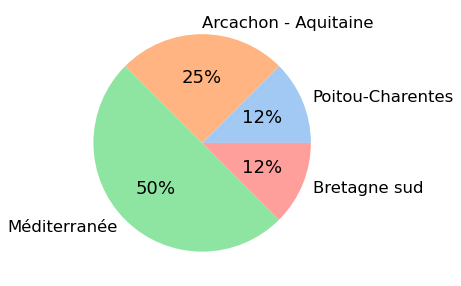

In [12]:
li = [x for x in plt.hist(df[df.columns[3]])[0] if x != 0]
plt.close()
palette_color = sns.color_palette('pastel')
sns.set_context("talk")
plt.pie(li, labels=["Poitou-Charentes","Arcachon - Aquitaine","Méditerranée","Bretagne sud"], colors=palette_color, autopct='%.0f%%')
#plt.savefig(path+'origin.png",dpi=300)
plt.show()

## Family buisness ?

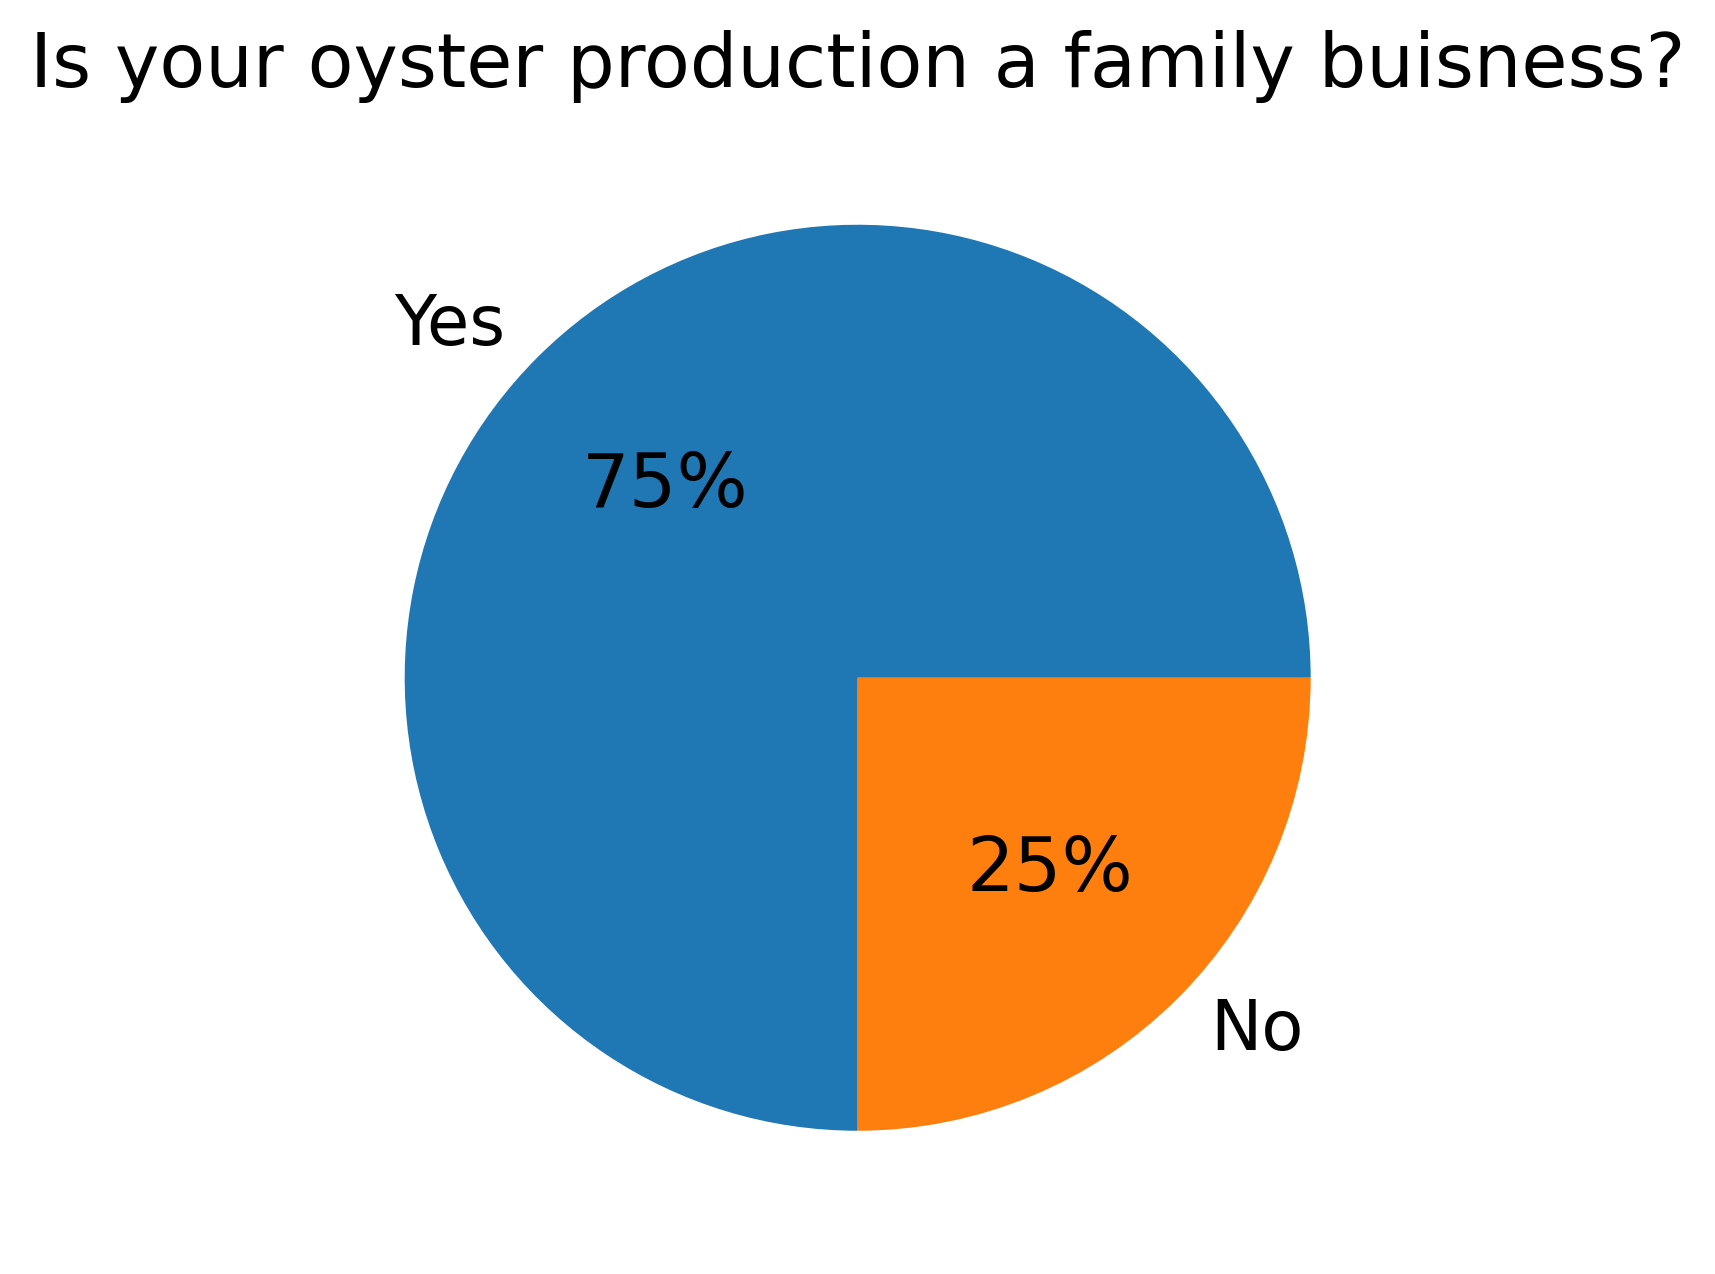

In [27]:
pie(7,["Yes","No"])
plt.title('Is your oyster production a family buisness?')
plt.savefig(path+'family_buisness.png')

## Where them impacted by infections ?

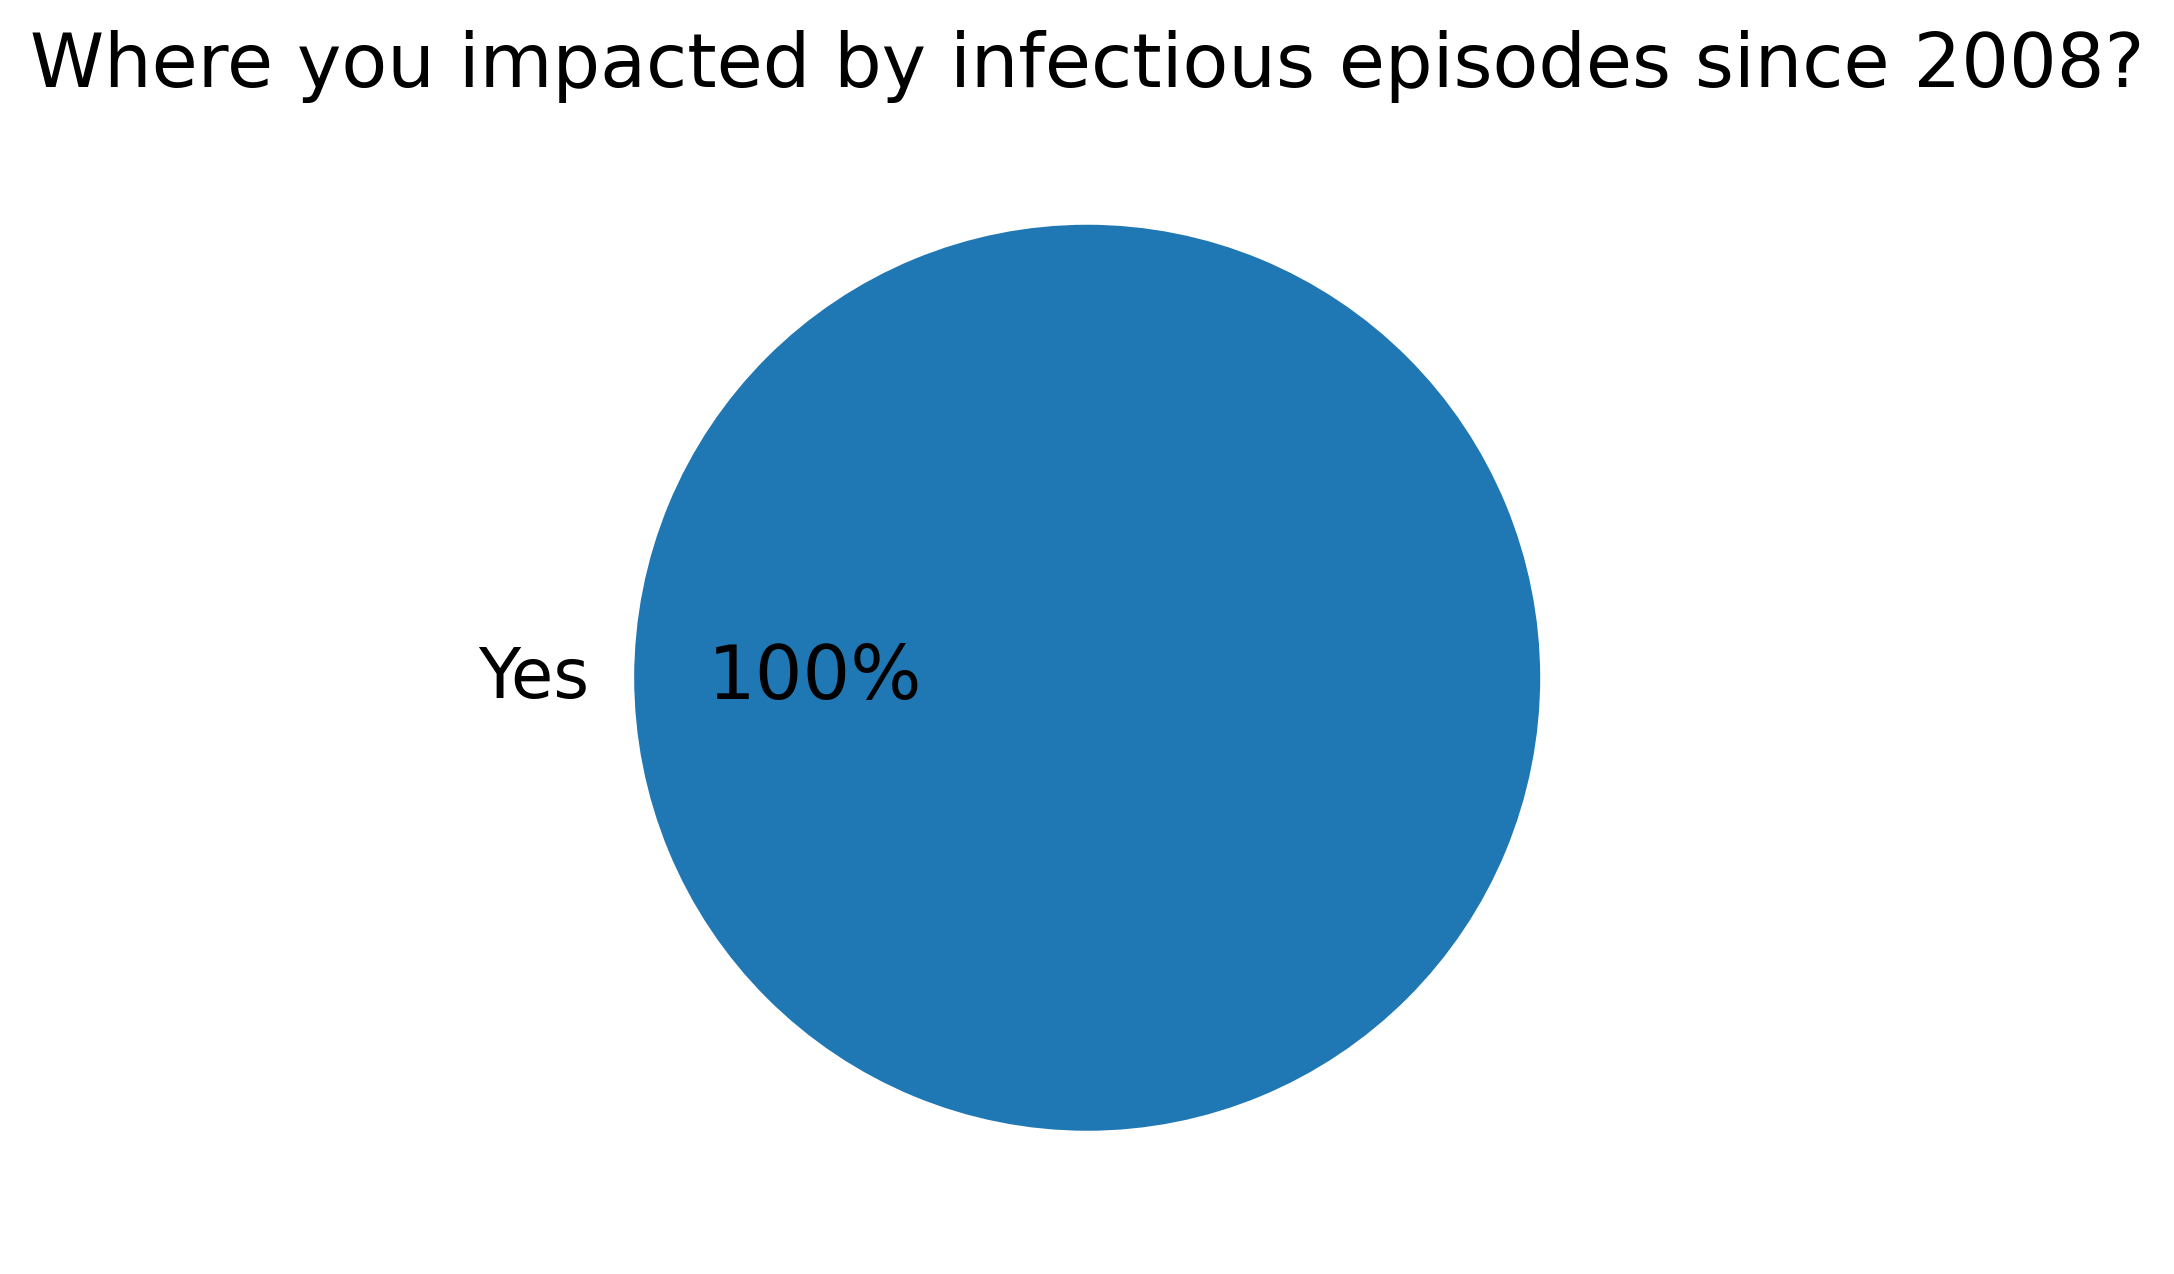

In [26]:
pie(11,["Yes"])
plt.title('Where you impacted by infectious episodes since 2008?')
plt.savefig(path+'impact.png')

## Every year ?

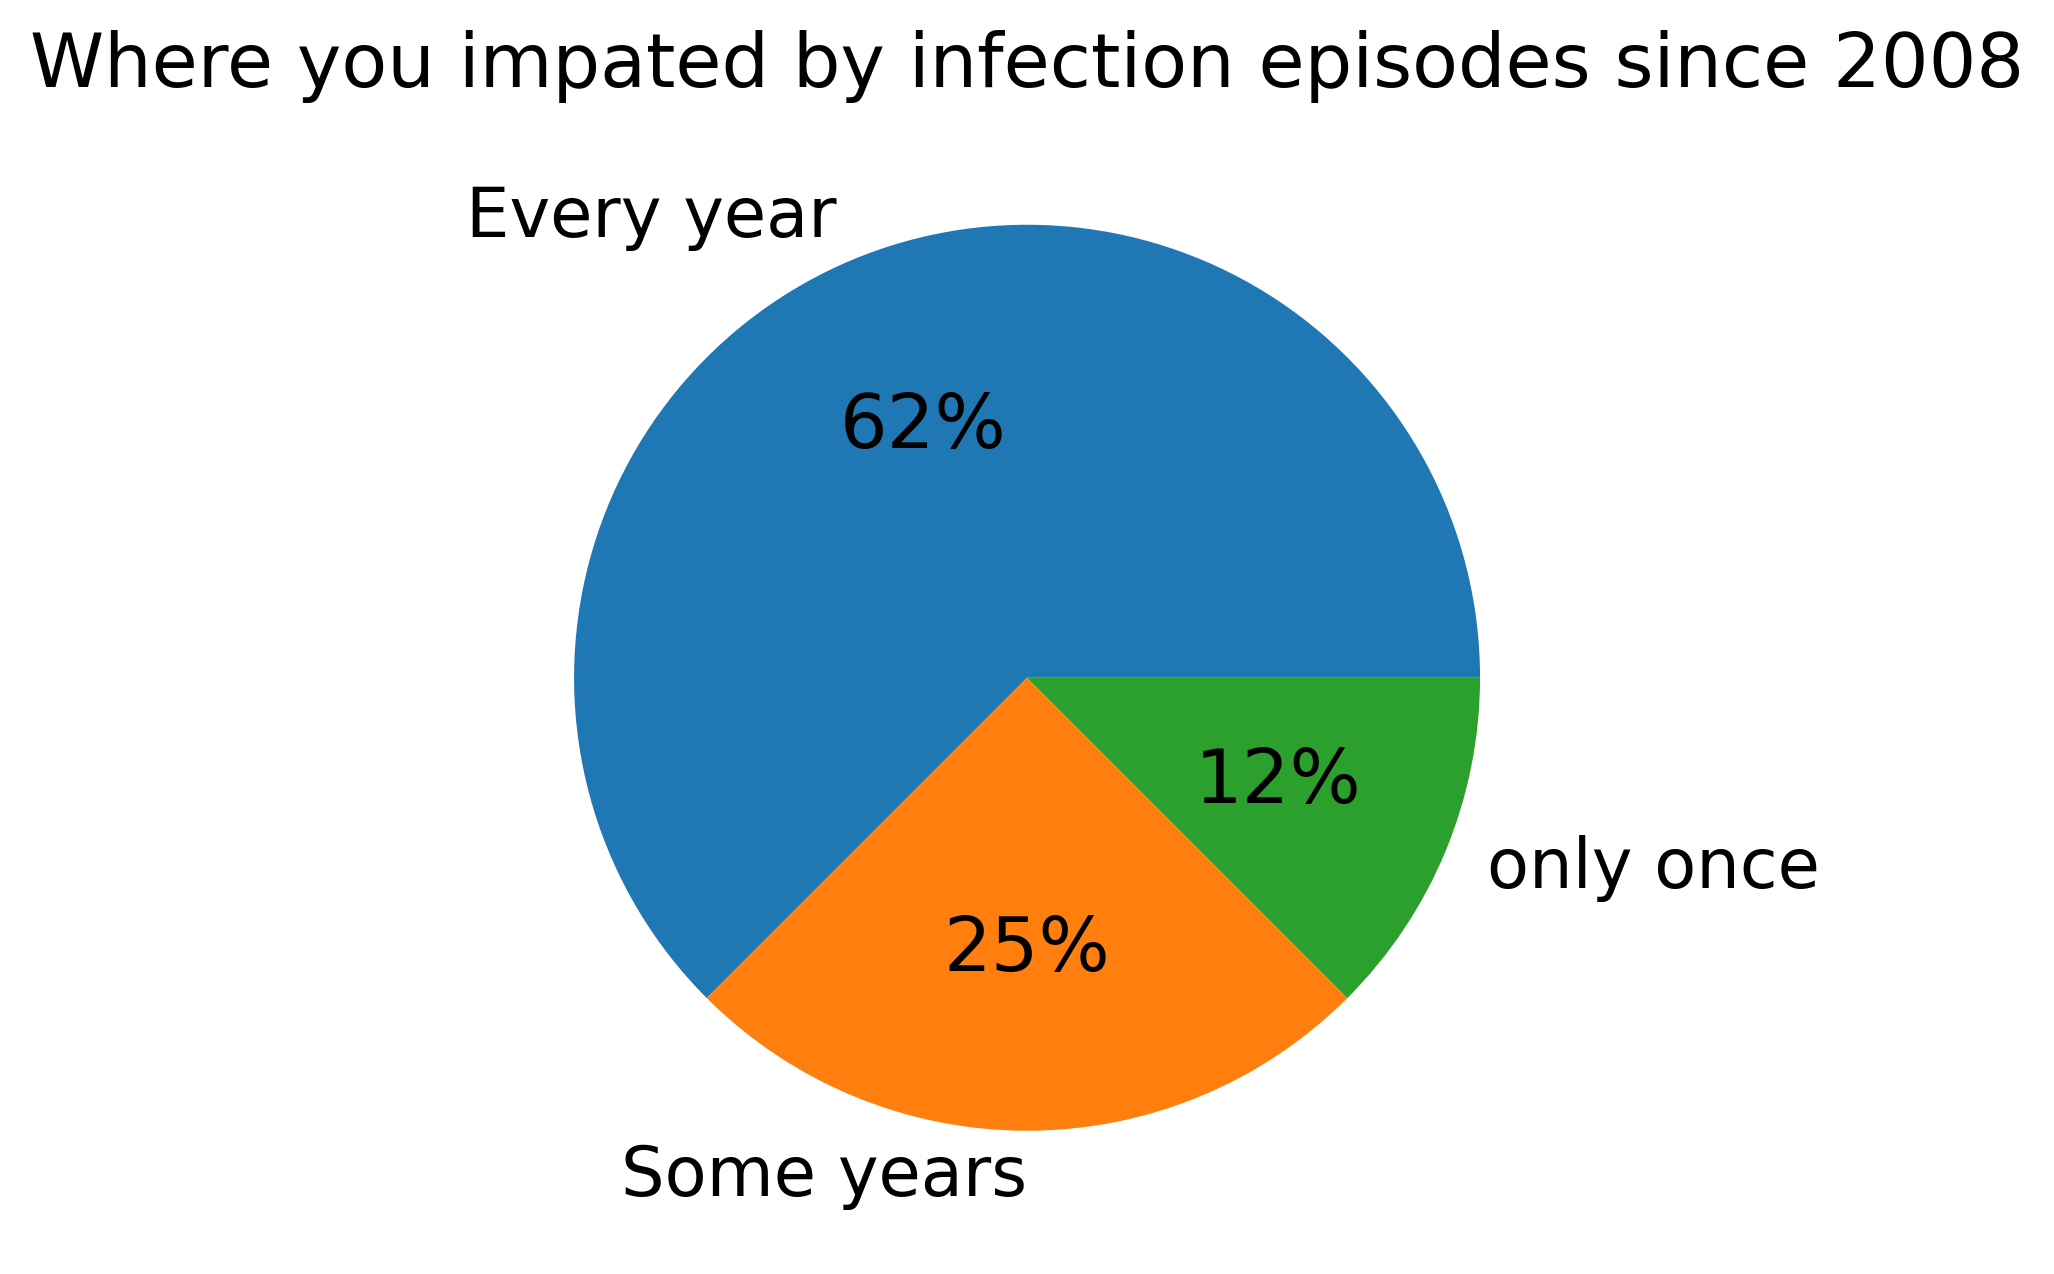

In [44]:
pie(12,["Every year","Some years","only once"])
plt.title("Where you impated by infection episodes since 2008")
plt.savefig(path+'frequency.png')
plt.show()

## Do you know the culprit

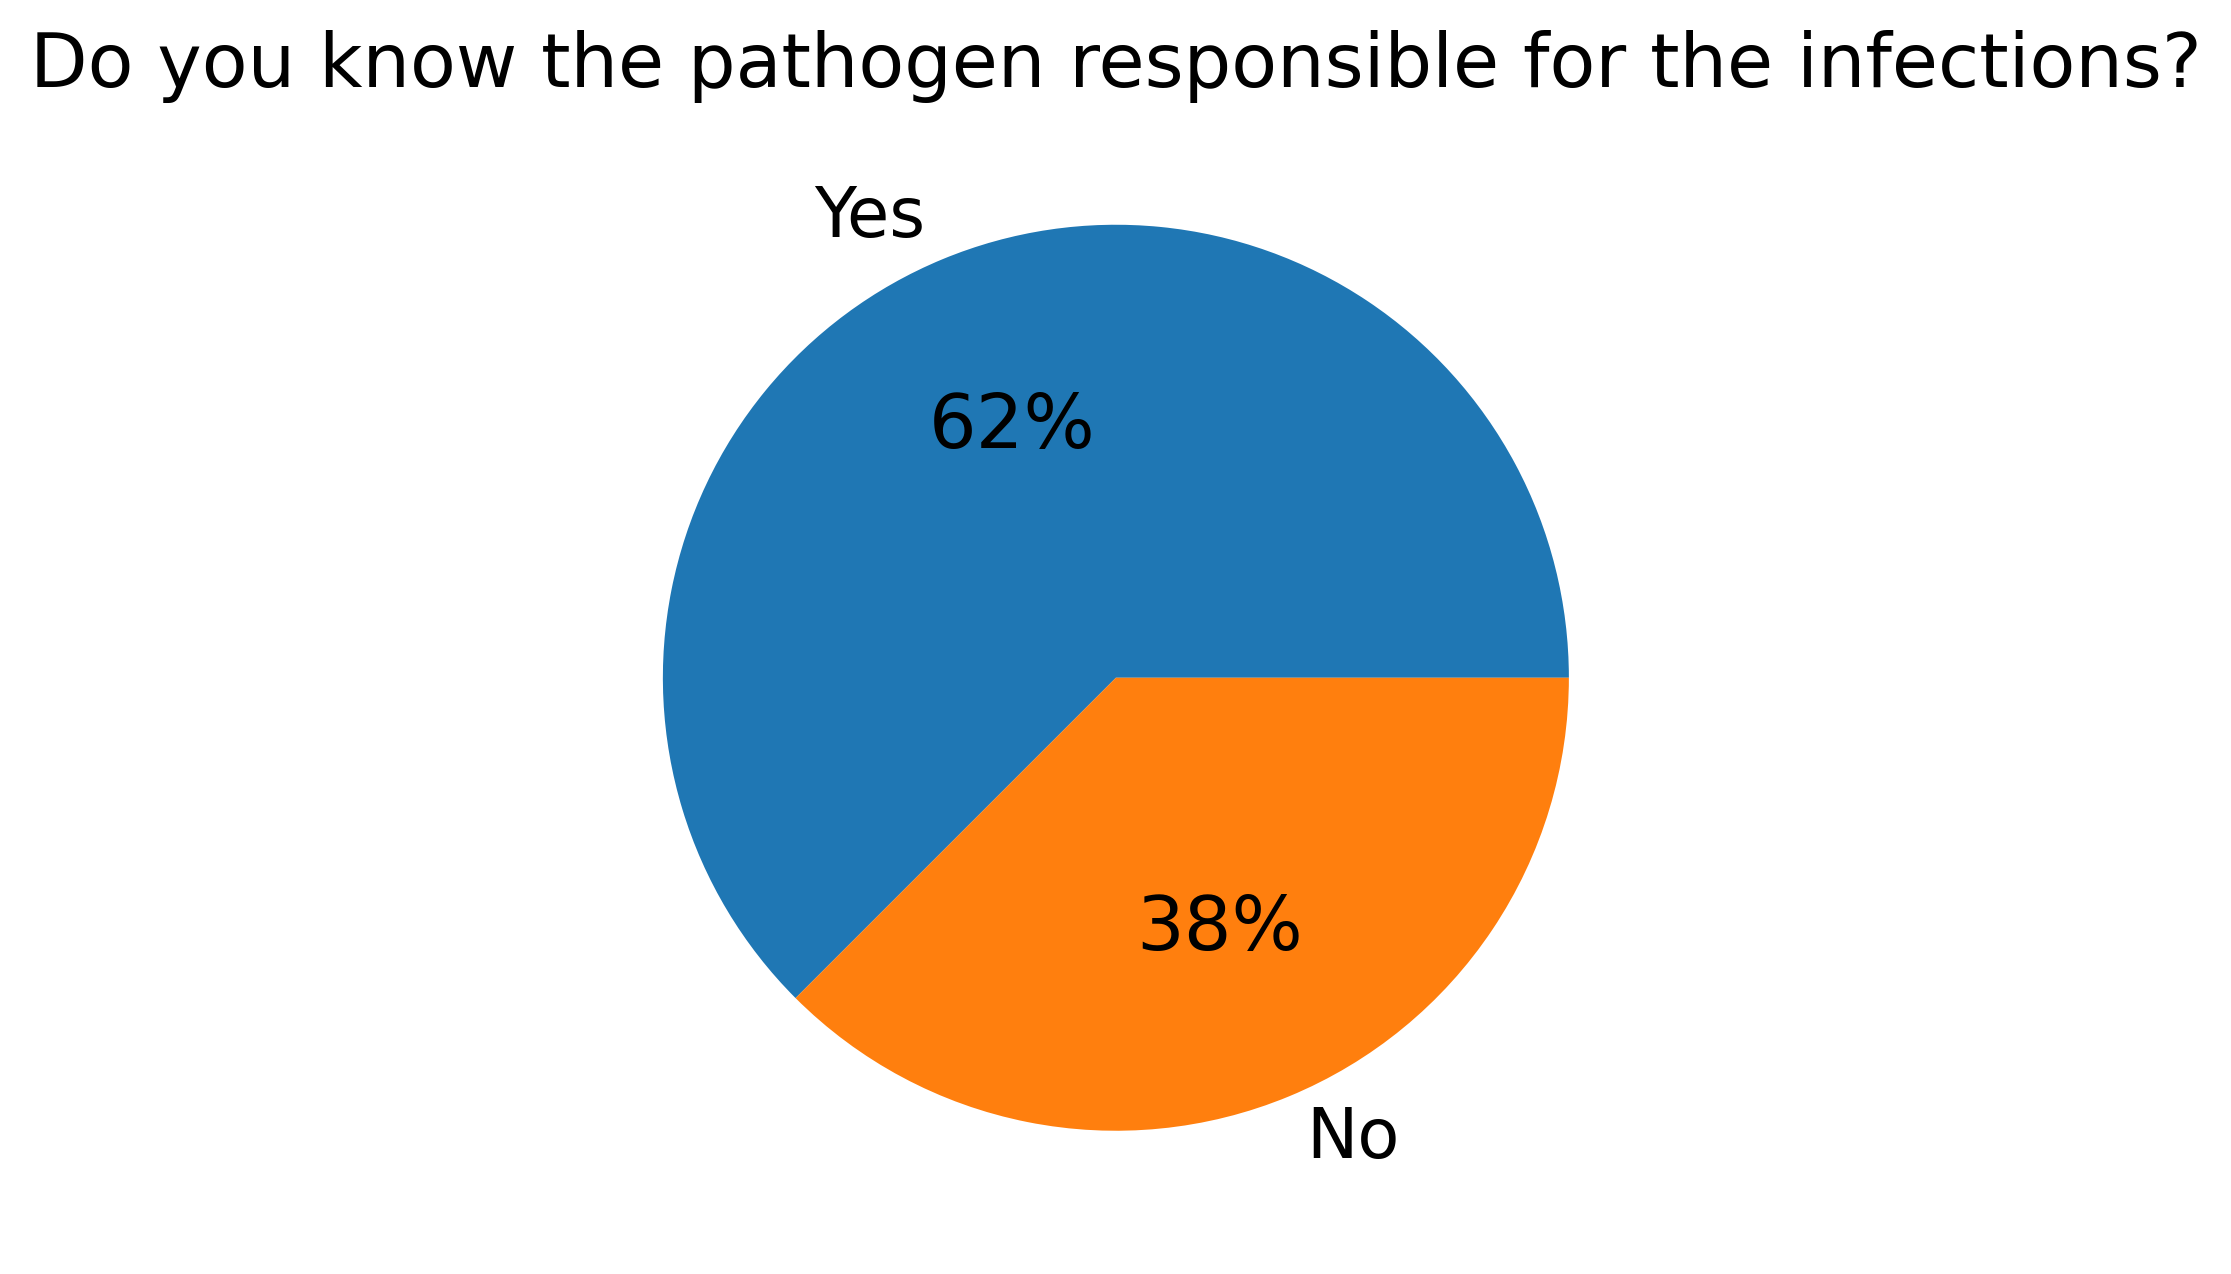

In [28]:
pie(13,["Yes","No"])
plt.title("Do you know the pathogen responsible for the infections?")
plt.savefig(path+'culprit.png')
plt.show()

## Which culprits

4 2 2


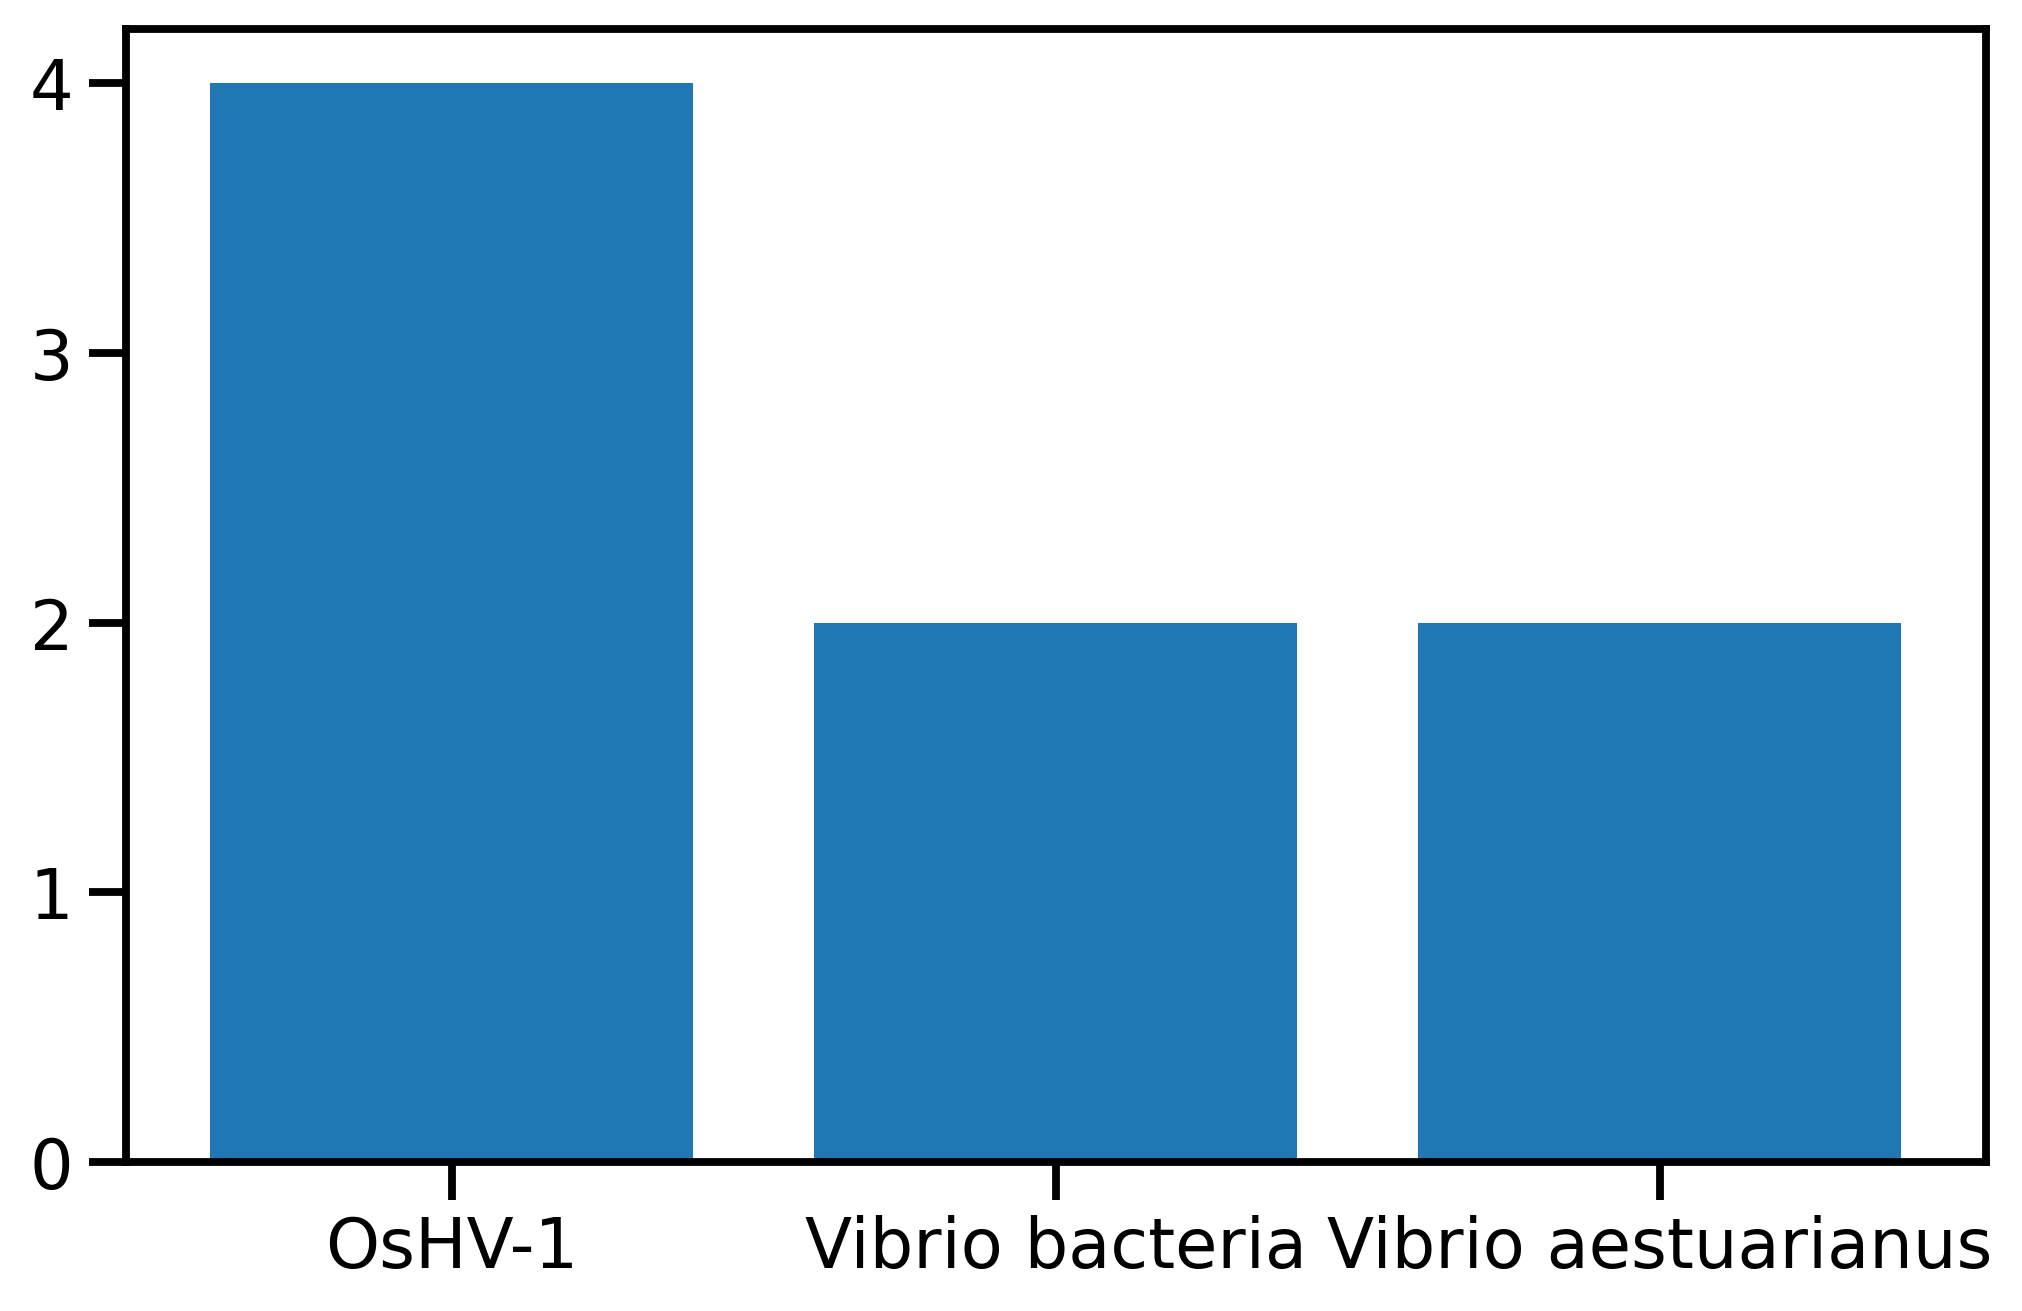

In [79]:
l = [x.split(';') for x in df[df.columns[14]] if x!=0]

hv= 0
bac = 0
va = 0

for i in l:
    for j in i:
        if re.search("OsHV-1",j)!= None:
            hv+= 1
        if re.search("d'une bactérie vibrio mais je ne sais pas la quelle",j)!= None:
            bac +=1
        if re.search("de Vibrio aestuarianus",j)!= None:
            va+= 1
            
print(hv,bac,va)

plt.bar([0,1,2],[hv,bac,va])
plt.xticks([0,1,2],["OsHV-1","Vibrio bacteria","Vibrio aestuarianus"])
plt.show()

## Did you have an economic impact following the infection

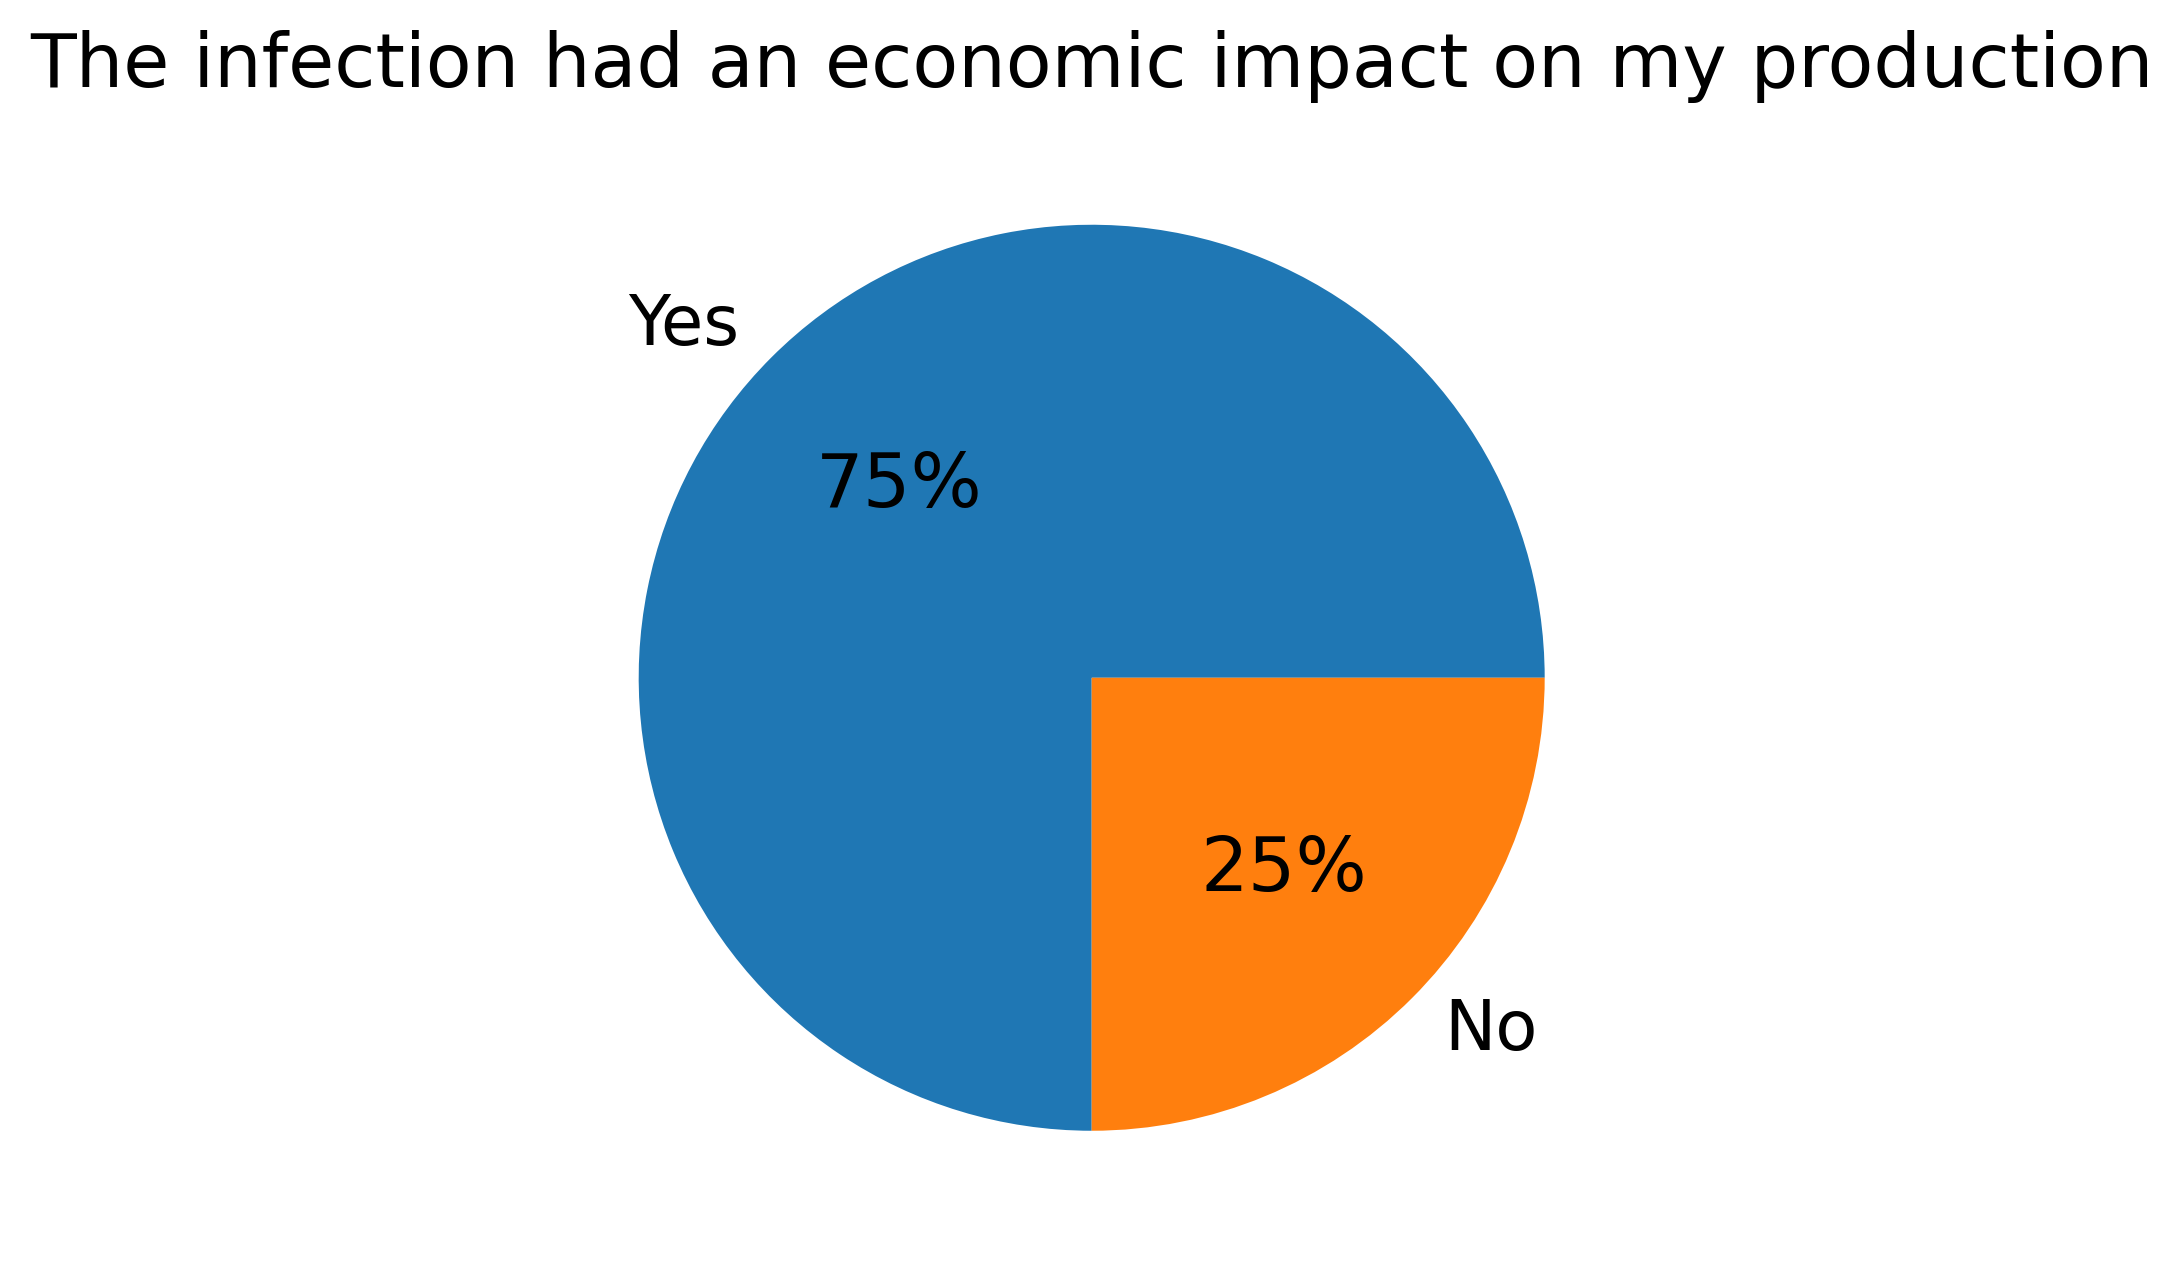

In [30]:
pie(15,["Yes","No"])
plt.title('The infection had an economic impact on my production')
plt.savefig(path+'economic_impact.png')

## Take any measures ? 

In [34]:
df[df.columns[16]].values

array(['Stockage sur dépôt haut', 'Aucune ', 0,
       'Eviter de stresser les huitres a certaines periodes',
       'Date de collage, trempe courte, bassin refroidit, captage local',
       'nombre de bêtes en année n', 'Aucune', 0], dtype=object)

## Do you think the project is relevant

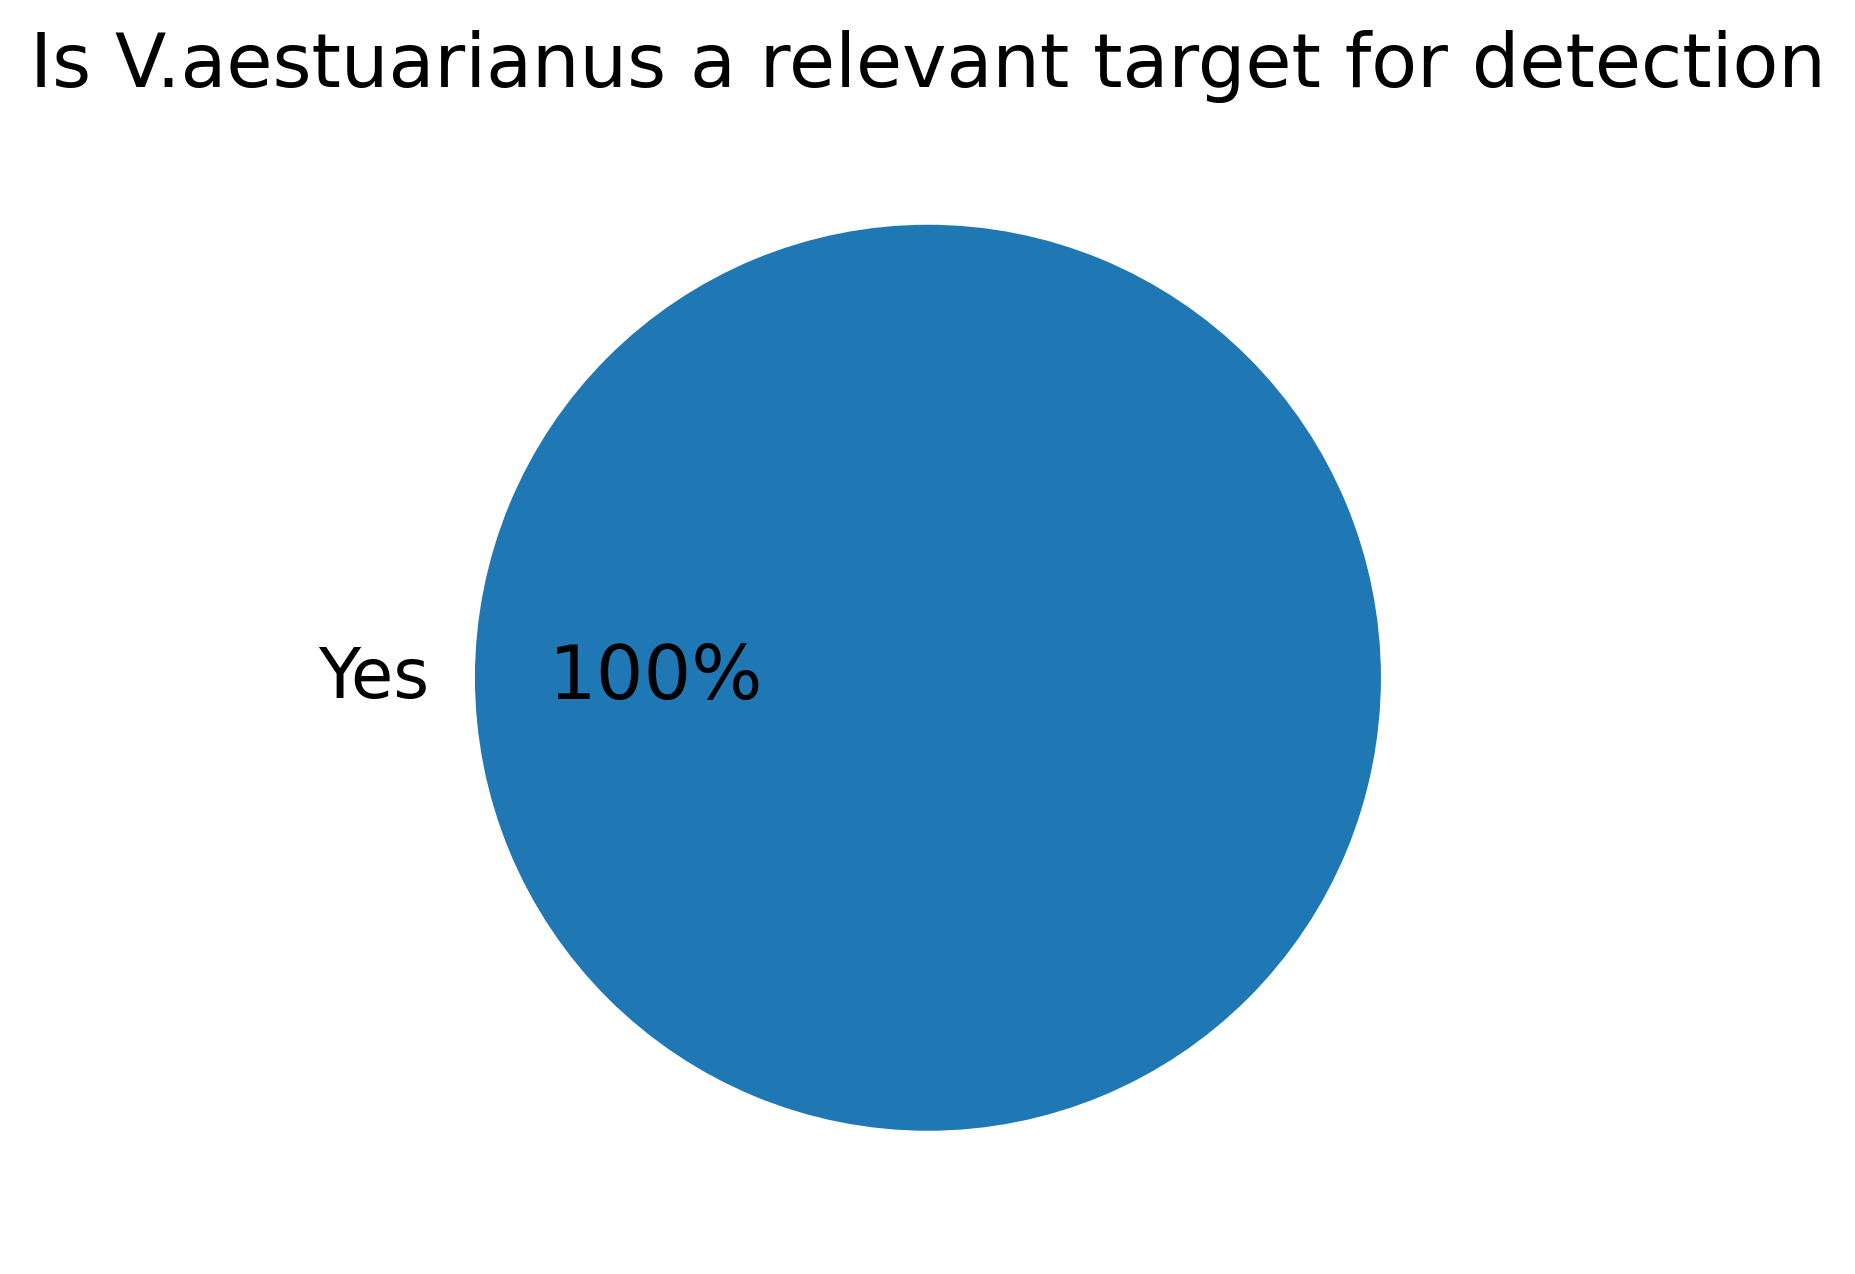

In [38]:
pie(18,["Yes"])
plt.title('Is V.aestuarianus a relevant target for detection')
plt.savefig(path+'relevant.png')

## Detect yourself ? 

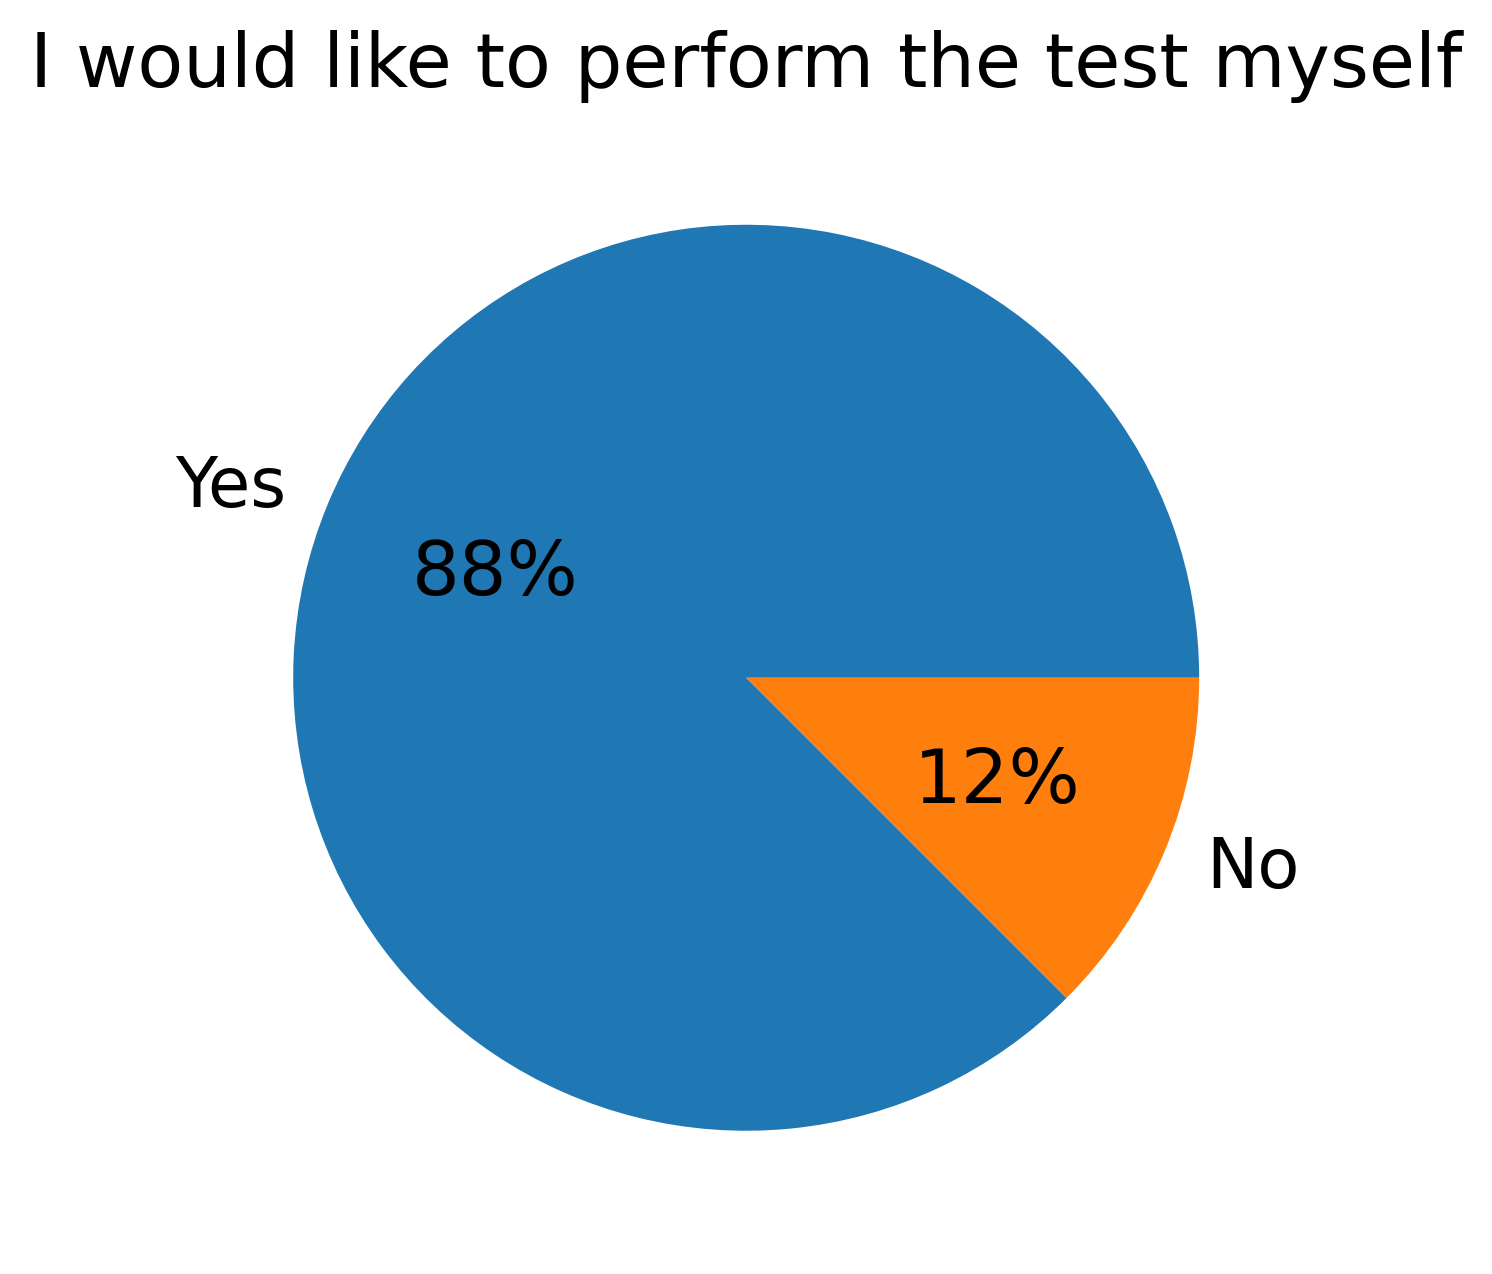

In [41]:
pie(19,["Yes","No"])
plt.title("I would like to perform the test myself")
plt.savefig(path+'yourself.png')

## Hard to perform the test yourself 

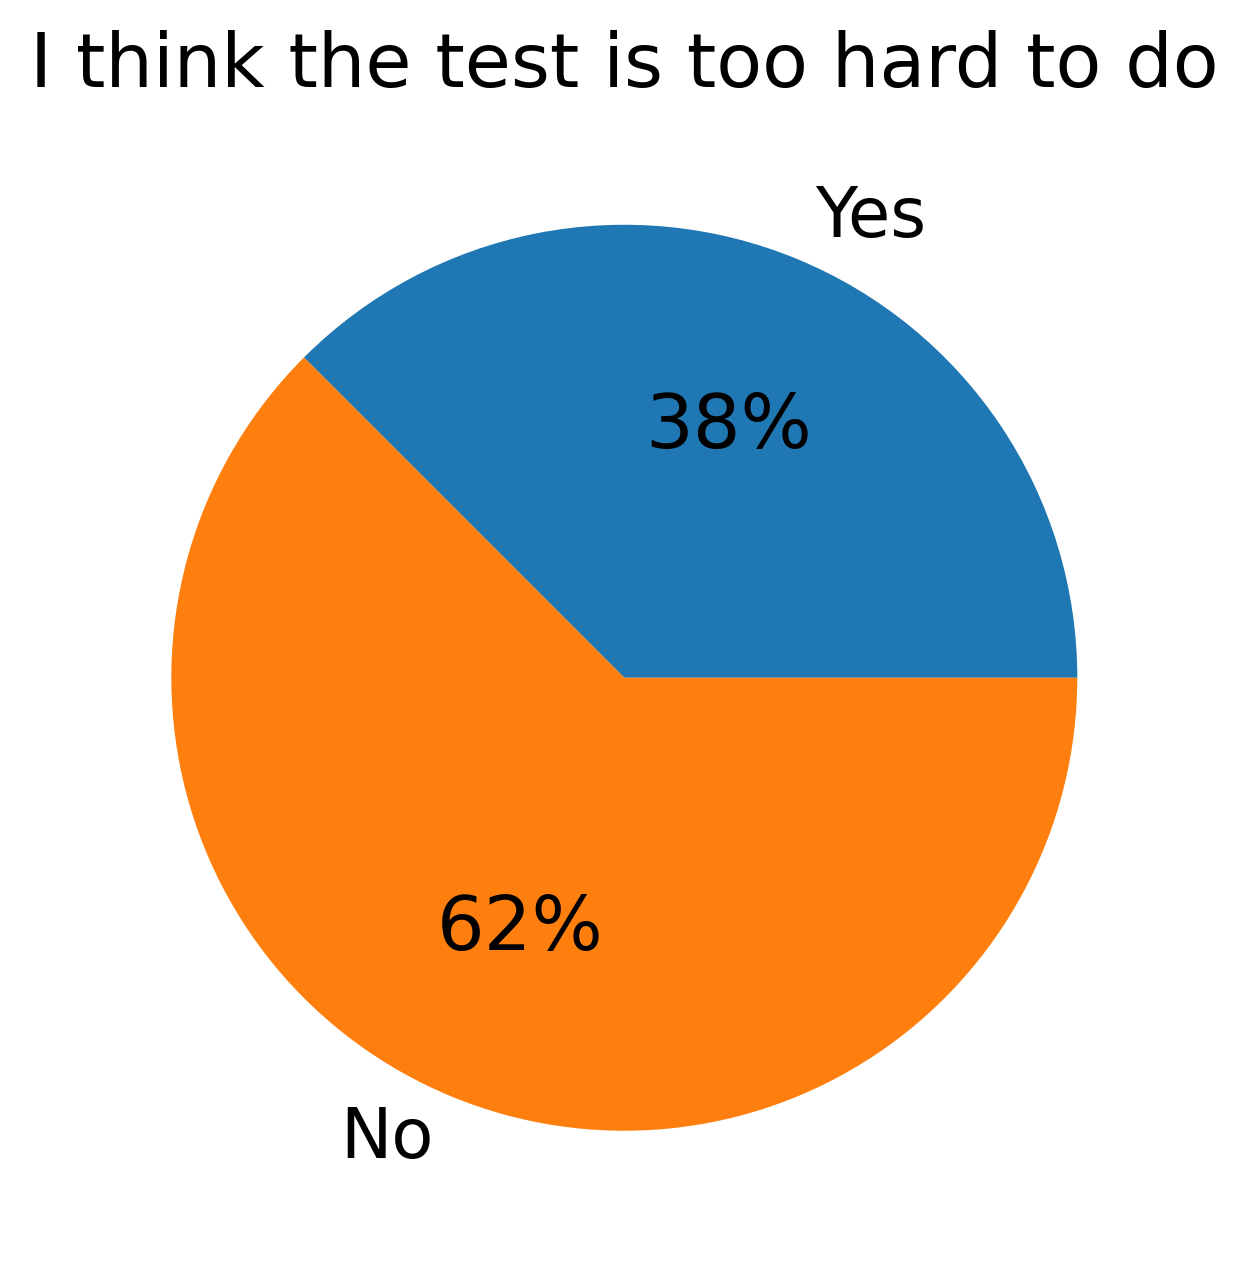

In [43]:
pie(23,["Yes","No"])
plt.title('I think the test is too hard to do')
plt.savefig(path+'hard.png')

### Exploratory

positive = 0
tot= 0

for i in df[df.columns[11]]:
    if i == "Oui":
        positive+=1
    tot+=1


palette= sns.color_palette('pastel')
plt.pie([positive,0],colors=palette)
plt.legend(["Yes","No"])
#plt.savefig("images/survey/impact.png",dpi=300)
plt.show()

x = [x for x in plt.hist(df[df.columns[12]])[0] if x!= 0]
plt.close()
plt.pie(x,labels=["Every year","Some years","only once"],autopct='%.0f%%')
plt.title("Where you impated by infection episodes since 2008")
plt.show()

l = [x for x in df[df.columns[14]] if x!=0 ]
li = [x for x in plt.hist(l)[0] if x!=0]
plt.close()
plt.pie(li,labels=["OsHV1","V.aesturianus","V.splendidus","Vibrio bacteria but I don't know which","OsHV1"],autopct='%.0f%%')
plt.show()